# Notebook Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Constants

In [5]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob_spam.txt'
TOKEN_NOSPAM_PROB_FILE = 'SpamData/03_Testing/prob_nospam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob_all_tokens.txt'

TEST_FEATURE_FILE = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'



VOCAB_SIZE = 2500

# Load the data

In [8]:
#Feature
X_test = np.loadtxt(TEST_FEATURE_FILE,delimiter=' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter=' ')
#Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_nospam = np.loadtxt(TOKEN_NOSPAM_PROB_FILE, delimiter=' ')
prob_token_all = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [10]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Set the prior

In [11]:
PROB_SPAM = 0.3116

In [12]:
np.log(prob_token_spam)

array([-4.71228902, -5.31908269, -4.9921103 , ..., -9.19754891,
       -8.69677362, -9.48523098])

## Joint probability in log format

## Calculate the probability
### $$P(Spam \, | \,X) = \frac{P(X \, | \, Spam) P(Spam)}{P(X)}$$
## In log fomat

### $$P(Spam \, | \,X) = P(X \, | \, Spam) - P(X) + P(Spam)$$

In [31]:
#La probabilidad de que un mail sea spam segun su token
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all)) + np.log(PROB_SPAM)

In [32]:
joint_log_spam[:5]

array([  3.23601561,  13.54690923,  19.22022405, -16.82311432,
        28.09250676])

In [33]:
#Probabilidad de que un email NO sea spam segun su token
joint_log_ham = X_test.dot(np.log(prob_token_nospam) - np.log(prob_token_all)) + np.log(1 - PROB_SPAM)

In [34]:
joint_log_ham[:5]

array([-11.04643297, -37.24645987, -38.19431329,  -2.68388872,
       -60.20626921])

# Making predictions

### Checking for higher joint probability 
$$ P(Spam | X) > P(Ham|X)$$
## <center>OR </center>
$$ P(Spam | X) < P(Ham|X)$$

In [35]:
#Calculamos si cada mail es spam o no. Spam = True
prediction = joint_log_spam > joint_log_ham

In [41]:
#Los primero 5 mails SI son spam
prediction[:5]

array([ True,  True,  True, False,  True])

In [141]:
#Coincide con la data que teniamos ya que 1 = spam
y_test[:5]

array([1., 1., 1., 1., 1.])

## Simplificar

In [42]:
#Podemos siplificar ya que en ambos lados estamos dividiendo por p(X), así que podemos eliminar esto
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_nospam)) + np.log(1 - PROB_SPAM)


# Metrics and evaluation

### Accuracy

In [50]:
incorrect_classified_emails = (y_test != prediction).sum()
correct_classified_emails = (y_test == prediction).sum()
print('Number of correctly calssified emails:',correct_classified_emails)
print('Number of incorrectly calssified emails:',incorrect_classified_emails)

Number of correctly calssified emails: 1668
Number of incorrectly calssified emails: 54


In [61]:
#Accuracy: Correct prerdictions/total predictions
print('The acccuracy of the model is: {:.2%}'.format(correct_classified_emails/len(X_test)))

The acccuracy of the model is: 96.86%


# Visualising the results with PLT

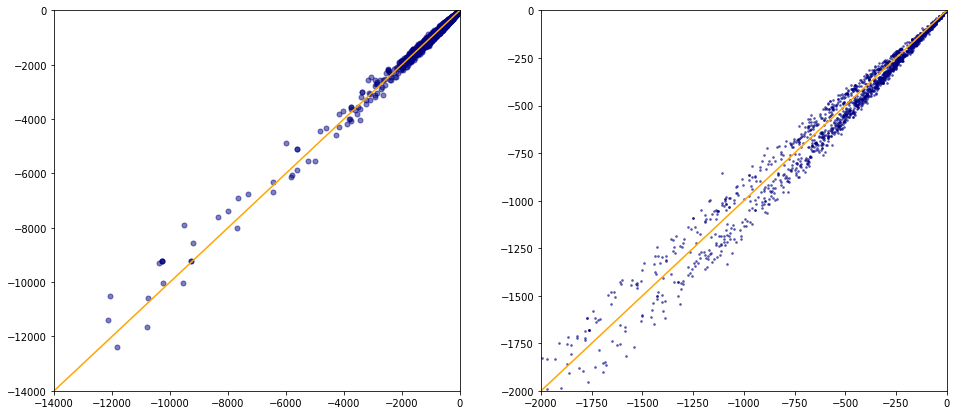

In [88]:
# Chart Styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

plt.figure(figsize=(16,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

#Chart Nr. 1
plt.subplot(1,2,1)

#Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

#Adding the decition baundary line
linedata = np.linspace(start=-14000,stop=1,num=1000)
plt.plot(linedata,linedata,color='orange')

#Adding the scatter point
plt.scatter(joint_log_ham,joint_log_spam,color='navy',s=25,alpha=0.5)

#Chart Nr. 2
plt.subplot(1,2,2)

#Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

#Adding the decition baundary line
linedata = np.linspace(start=-14000,stop=1,num=1000)
plt.plot(linedata,linedata,color='orange')

#Adding the scatter point
plt.scatter(joint_log_ham,joint_log_spam,color='navy',s=3,alpha=0.5)


plt.show()

# Visualising with Seaborn

In [ ]:
#Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

#Creating the data
summary_df = pd.DataFrame({yaxis_label : joint_log_spam,xaxis_label:joint_log_ham,labels:y_test})


#Ploting the scatter points
sns.lmplot(x=xaxis_label,y=yaxis_label,data= summary_df,height=6.5,fit_reg=False,legend=False,
          scatter_kws={'alpha':0.7,'s':25},hue=label\ s,markers=['o','x'],palette='hls')

#Setting the scale
plt.xlim([-500,1])
plt.ylim([-500,1])

#Plotting the decition baudary line
plt.plot(linedata,linedata,color='black')

#Setting the lengend style
plt.legend(('Decition Boundary','No Spam','Spam'),loc='lower right',fontsize=14)

plt.show()

# False Positives and False Negatives

In [118]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1167,  555]))

In [120]:
#Checar cuantos mails sí estaban bien clasificados
true_pos = (y_test == 1) & (prediction == 1)
true_pos.sum()

544

In [132]:
#Checar cuandos NO Spam emails fueron clasificados como spam
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

11

In [133]:
#Checar cuantos mails eran spam y pasaron como No Spam
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

43

# Recall Score & presitin Metric

In [134]:
recall_score = true_pos.sum() / (true_pos.sum()+false_neg.sum())
print('The recall score is: {:.2%}'.format(recall_score))

The recall score is: 92.67%


In [136]:
presition_score = true_pos.sum() / (true_pos.sum()+false_pos.sum())
print('The Pesition metric is: {:.2%}'.format(presition_score))

The recall score is: 98.02%


# F1 Score

In [139]:
f1_score = 2*((recall_score*presition_score)/(recall_score+presition_score))
print('The F1 Score is: {:.2%}'.format(f1_score))

The F1 Score is: 95.27%
